# Libraries

In [ ]:
# This library allows you to manipulate, simplify, and solve equations in Python
import sympy

# Example
What is the side length of a square with an area of 2?

In [ ]:
target_area = 2.0

# Define the variable
x = sympy.Symbol('x')
area = sympy.Symbol('A')

# Define the equation
eqn = sympy.Eq(target_area, area)

# Substitute
eqn = eqn.subs(area, x*x)

# Solve
result = sympy.solve(eqn, x)

# Result
print(result)

[-1.41421356237310, 1.41421356237310]


# Now, Let's Design!

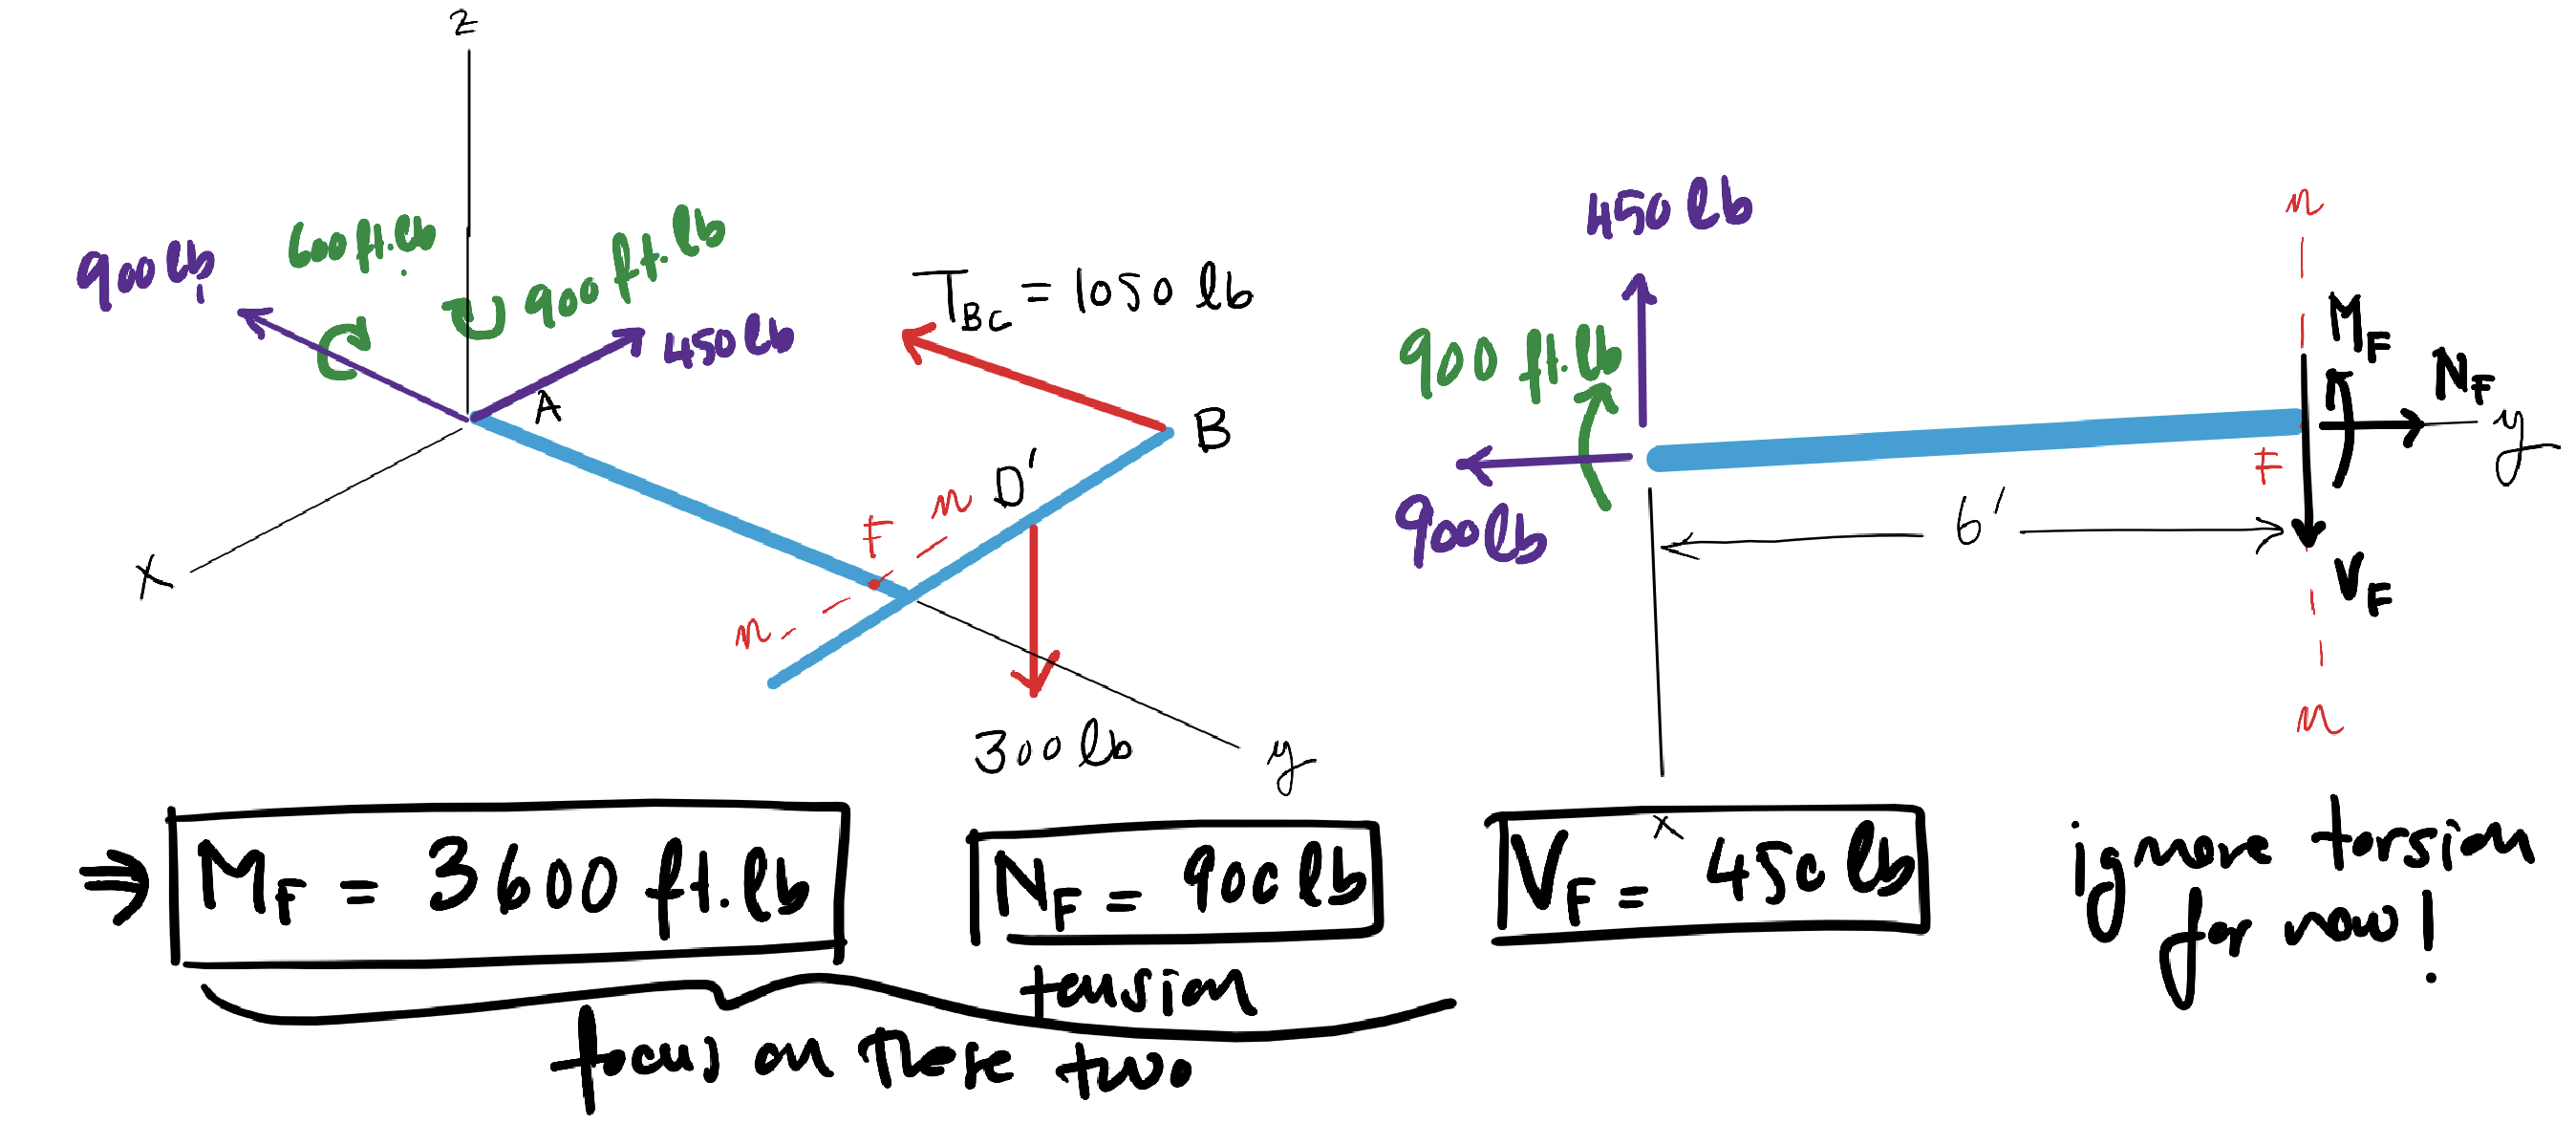

In [ ]:
# Define parameters associated with the problem
target_FOS = 2.0 # unitless
sigma_yield = 36000 # psi
F = 900 # pounds-force
M = 3600 * 12 # multiply by 12 in/ft to convert from foot-pounds to foot-inches

# Axial Only


In [ ]:
# Define variables
force = sympy.symbols('F')
area = sympy.symbols('A')
radius = sympy.symbols('r')
factor_of_safety = sympy.symbols('FOS')
yield_stress = sympy.symbols('sigma_yield')
actual_stress = sympy.symbols('sigma_actual')

In [ ]:
# Start with an FOS equation
FOS_eqn = sympy.Eq(factor_of_safety, yield_stress/actual_stress)
w
# Substitute in for things that we know
FOS_eqn = FOS_eqn.subs(actual_stress, force/area)
FOS_eqn = FOS_eqn.subs(area, sympy.pi*radius*radius)

# Take a look at the equation
FOS_eqn

Eq(FOS, pi*r**2*sigma_yield/F)

In [ ]:
# Solve for the radius
r_axial_eqn = sympy.solve(FOS_eqn, radius)
r_axial_eqn

[-sqrt(F*FOS/sigma_yield)/sqrt(pi), sqrt(F*FOS/sigma_yield)/sqrt(pi)]

In [ ]:
# Select the second solution since r should be positive
r_axial_eqn = r_axial_eqn[1]
r_axial_eqn

sqrt(F*FOS/sigma_yield)/sqrt(pi)

In [ ]:
# Make substitutions with known values and compute!
values_from_problem = {
    force: F,
    factor_of_safety: target_FOS,
    yield_stress: sigma_yield
}
r_axial = r_axial_eqn.subs(values_from_problem).evalf()

# Take a look at the solution value
r_axial

0.126156626101008

# Bending Only

In [ ]:
# Define variables
force = sympy.symbols('F')
area = sympy.symbols('A')
radius = sympy.symbols('r')
factor_of_safety = sympy.symbols('FOS')
yield_stress = sympy.symbols('sigma_yield')
actual_stress = sympy.symbols('sigma_actual')
moment = sympy.symbols('M')
moment_of_inertia = sympy.symbols('I')
distance_from_neutral_axis = sympy.symbols('y')

In [ ]:
# Start with an FOS equation.
FOS_eqn = sympy.Eq(factor_of_safety, yield_stress/actual_stress)

# Substitute things that we know
FOS_eqn = FOS_eqn.subs(actual_stress, moment*distance_from_neutral_axis/moment_of_inertia)
FOS_eqn = FOS_eqn.subs(distance_from_neutral_axis, radius)
FOS_eqn = FOS_eqn.subs(moment_of_inertia, sympy.pi*radius*radius*radius*radius/4)

# Take a look at the equation
FOS_eqn

Eq(FOS, pi*r**3*sigma_yield/(4*M))

In [ ]:
# Solve for r
r_bending_eqn = sympy.solve(FOS_eqn, radius)
r_bending_eqn

[2**(2/3)*(FOS*M/sigma_yield)**(1/3)/pi**(1/3),
 -2**(2/3)*(FOS*M/sigma_yield)**(1/3)/(2*pi**(1/3)) - 2**(2/3)*sqrt(3)*I*(FOS*M/sigma_yield)**(1/3)/(2*pi**(1/3)),
 -2**(2/3)*(FOS*M/sigma_yield)**(1/3)/(2*pi**(1/3)) + 2**(2/3)*sqrt(3)*I*(FOS*M/sigma_yield)**(1/3)/(2*pi**(1/3))]

In [ ]:
# Select the first solution since r should be positive and real
r_bending_eqn = r_bending_eqn[0]
r_bending_eqn

2**(2/3)*(FOS*M/sigma_yield)**(1/3)/pi**(1/3)

In [ ]:
# Make substitutions with known values and compute!
values_from_problem = {
    force: F,
    factor_of_safety: target_FOS,
    yield_stress: sigma_yield,
    moment: M
}
r_bending = r_bending_eqn.subs(values_from_problem).evalf()
r_bending

1.45113267143912

# Bending + Axial

In [ ]:
# Define variables
force = sympy.symbols('F')
area = sympy.symbols('A')
radius = sympy.symbols('r')
factor_of_safety = sympy.symbols('FOS')
yield_stress = sympy.symbols('sigma_yield')
actual_stress = sympy.symbols('sigma_actual')
moment = sympy.symbols('M')
moment_of_inertia = sympy.symbols('I')
distance_from_neutral_axis = sympy.symbols('y')
axial_stress = sympy.symbols('sigma_axial')
bending_stress = sympy.symbols('sigma_bending')

In [ ]:
# Start with an FOS equation
FOS_eqn = sympy.Eq(factor_of_safety, yield_stress/actual_stress)

# Substitute things that you know
FOS_eqn = FOS_eqn.subs(actual_stress, axial_stress + bending_stress)
FOS_eqn = FOS_eqn.subs(bending_stress, moment*distance_from_neutral_axis/moment_of_inertia)
FOS_eqn = FOS_eqn.subs(distance_from_neutral_axis, radius)
FOS_eqn = FOS_eqn.subs(moment_of_inertia, sympy.pi*radius*radius*radius*radius/4)
FOS_eqn = FOS_eqn.subs(axial_stress, force/area)
FOS_eqn = FOS_eqn.subs(actual_stress, force/area)
FOS_eqn = FOS_eqn.subs(area, sympy.pi*radius*radius)

# Take a look at teh equation
FOS_eqn

Eq(FOS, sigma_yield/(F/(pi*r**2) + 4*M/(pi*r**3)))

In [ ]:
# Solve for r
r_combined_eqn = sympy.solve(FOS_eqn, radius)
r_combined_eqn

[-F*FOS/(pi*sigma_yield*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)) - (-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)/3,
 -F*FOS/(pi*sigma_yield*(-1/2 - sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)/3,
 -F*FOS/(pi*sigma_yield*(-1/2 + sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)/3]

In [ ]:
# Its not clear which one we need on inspection, so let's use all 3 and see what comes out
values_from_problem = {
    force: F,
    factor_of_safety: target_FOS,
    yield_stress: sigma_yield,
    moment: M
}
for eqn in r_combined_eqn:
    print(eqn.subs(values_from_problem).evalf())

-0.727394271682852 + 1.25355166830964*I
-0.727394271682852 - 1.25355166830964*I
1.4547885433657 - 1.31831910125639e-23*I


In [ ]:
# Ultimately it looks like we want the last option, since the imaginary value seems like a roundoff error
r_combined_eqn[2]

-F*FOS/(pi*sigma_yield*(-1/2 + sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-54*FOS*M/(pi*sigma_yield) + sqrt(-108*F**3*FOS**3/(pi**3*sigma_yield**3) + 11664*FOS**2*M**2/(pi**2*sigma_yield**2))/2)**(1/3)/3

In [ ]:
# Can we simplify it at all?
sympy.simplify(r_combined_eqn[2])

3**(1/3)*(4*3**(1/3)*pi**(4/3)*F*FOS + sigma_yield*((-18*pi**(5/2)*FOS*M + sqrt(3)*pi**2*sigma_yield*sqrt(FOS**2*(-F**3*FOS + 108*pi*M**2*sigma_yield)/sigma_yield**3))/sigma_yield)**(2/3)*(1 - sqrt(3)*I)**2)/(6*pi**(7/6)*sigma_yield*((-18*pi**(5/2)*FOS*M + sqrt(3)*pi**2*sigma_yield*sqrt(FOS**2*(-F**3*FOS + 108*pi*M**2*sigma_yield)/sigma_yield**3))/sigma_yield)**(1/3)*(1 - sqrt(3)*I))

In [ ]:
# Let's trim off the imaginary bit for our final solution.
r_combined = sympy.simplify(r_combined_eqn[2]).subs(values_from_problem).evalf().as_two_terms()[0]
r_combined

1.45478854125589